# 4.4.2 分類

In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
# Irisデータセットを読み込む
iris = load_iris()
X, y = iris.data, iris.target
# 先頭5行を表示
print('X:')
print(X[:5, :])
print('y:')
print(y[:5])

X:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
y:
[0 0 0 0 0]


In [3]:
from sklearn.model_selection import train_test_split
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


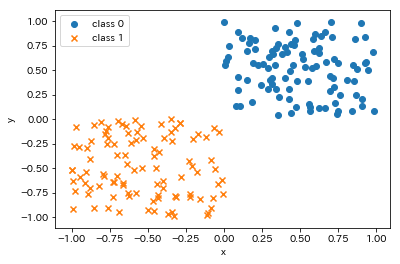

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
# X軸Y軸ともに0空1までの一様分布から100点をサンプリング
X0 = np.random.uniform(size=(100, 2))
# クラス0ラベルを100個生成
y0 = np.repeat(0, 100)
# X軸Y軸ともに-1から0までの一様分布から100点をサンプリング
X1 = np.random.uniform(-1.0, 0.0, size=(100, 2))
# クラス1のラベルを100個生成
y1 = np.repeat(1, 100)
# 散布図にプロット
fig, ax = plt.subplots()
ax.scatter(X0[:, 0], X0[:, 1], marker='o', label='class 0')
ax.scatter(X1[:, 0], X1[:, 1], marker='x', label='class 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

In [5]:
from sklearn.svm import SVC
# 学習、および決定協会、マージン、サポートベクタを可視化する関数
def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1):
    # サポートベクタマシンのインスタンス化
    svc = SVC(kernel=kernel, C=C)
    # 学習
    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))
    
    fig, ax = plt.subplots()
    ax.scatter(X0[:, 0], X0[:, 1], marker='o', label='class 0')
    ax.scatter(X1[:, 0], X1[:, 1], marker='x', label='class 1')
    # 決定協会とマージンをプロット
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p,
               colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])
    # サポートベクタをプロット
    ax.scatter(svc.support_vectors_[:, 0],
               svc.support_vectors_[:, 1],
               s=250, facecolors='none',
              edgecolors='black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()

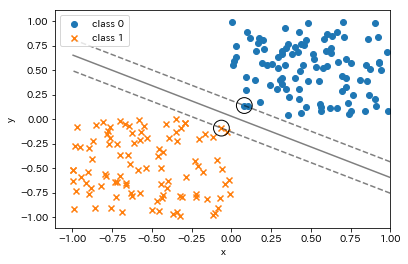

In [6]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='linear', C=1e6)

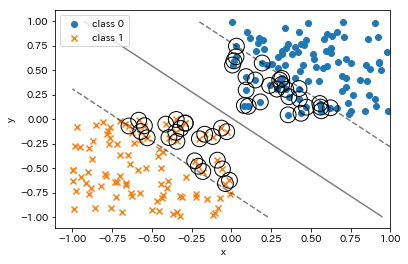

In [7]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='linear', C=0.1)

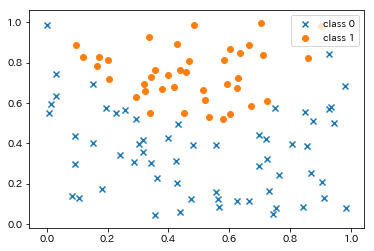

In [8]:
np.random.seed(123)
X = np.random.random(size=(100, 2))
y = (X[:, 1] > 2*(X[:, 0]-0.5)**2 +0.5).astype(int)
fig, ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y ==0, 1], marker='x', label='class 0')
ax.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label='class 1')
ax.legend()
plt.show()

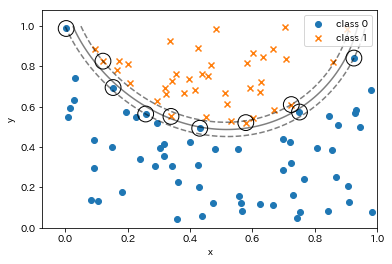

In [9]:
# 決定境界、マージン、サポートベクタをプロット
X0, X1 = X[y == 0, :], X[y == 1, :]
y0, y1 = y[y == 0], y[y == 1]
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='rbf', C=1e3, xmin=0, ymin=0)

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# Irisデータセットを読み込む
iris = load_iris()
X, y = iris.data, iris.target
# 学習データセットとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# 決定木をインスタンス化する (木の最大深さ=3)
tree = DecisionTreeClassifier(max_depth=3)
# 学習
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
# dot形式のデータを抽出
dot_data = export_graphviz(tree, filled=True,
                rounded=True,
                class_names=['Setosa',
                     'Versicolor',
                     'Virigica'],
                feature_names=['Speal Length',
                               'Spal Width',
                               'Petal Length',
                               'Petal Width'],
                out_file=None)
# 決定木のプロットを出力
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [12]:
# 予測
y_pred = tree.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2])

In [13]:
from sklearn.ensemble import RandomForestClassifier
# ランダムフォレストをインスタンス化する
forest = RandomForestClassifier(n_estimators=100, random_state=123)
# 学習
forest.fit(X_train, y_train)
# 予測
y_pred = forest.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2])